### Baseline experiment

Experiment to compare the 4 Optimization algorithms before trying to improve sparse search

In [5]:
import sys  
sys.path.insert(0, '../')

import HPO
import pysgpp
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
import sklearn.metrics
from sklearn.model_selection import KFold
import numpy as np
import keras
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from numpy.random import seed
import random
import time
import os
import math
from matplotlib import cm
import matplotlib 

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

random.seed(1)
seed(2)
tf.random.set_seed(3)

def reset_seeds():
    np.random.seed(1)
    random.seed(2)
    tf.random.set_seed(3)

VERBOSE = 0

SPARSE_RESULT = []
SPARSE_RESULT_OPTIMIZED = []

SPARSE_COST = []
SPARSE_COST_OPTIMIZED = []

### Hyperparameter space definition

In [6]:
hyperparameterspace = {
    'x0': ["interval", -5, 10],
    'x1': ["interval", -5, 10],
    #'learning_rate': ["interval-log", 0.000000001, 0.1],
    #'number_layers': ["interval-int", 1, 20],
    #'neurons_per_layer': ["interval-int", 1, 50]
}

hyperparameterspace_special = {}
for key in hyperparameterspace.keys():
    liste = []
    for i in range(1, len(hyperparameterspace[key])):
        liste.append(hyperparameterspace[key][i])
    hyperparameterspace_special[key] = liste



### Experiment parameters

In [7]:


BUDGETS = [1 + i * 52 for i in range(19)]

### Optimization

INITIAL POINTS:
Optimum:
[4.089162485176937, 4.1020260046125685]
15934.023920832717


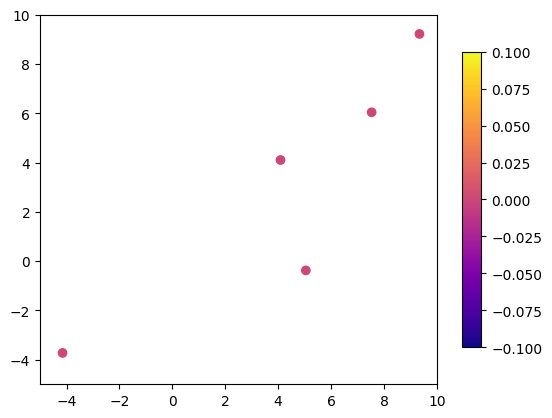

Optimum:
[2.158598821577871, 4.6177433827598735]
1.5171211267480789


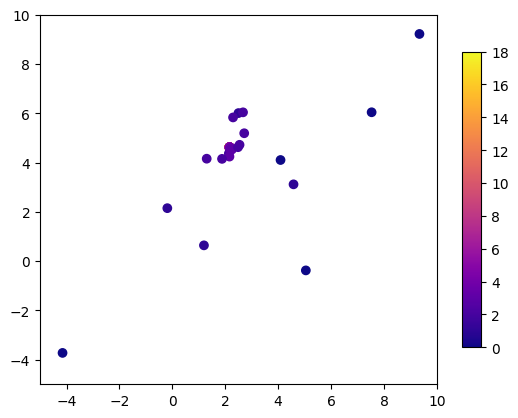

Optimum:
[2.158598821577871, 4.6177433827598735]
1.5171211267480789


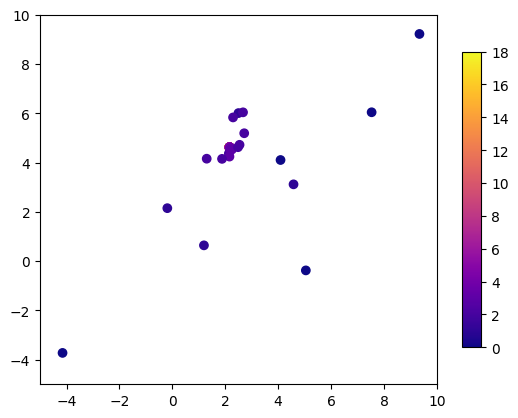

Optimum:
[0.4058562472117627, -0.04054645111546973]
4.566409386159776


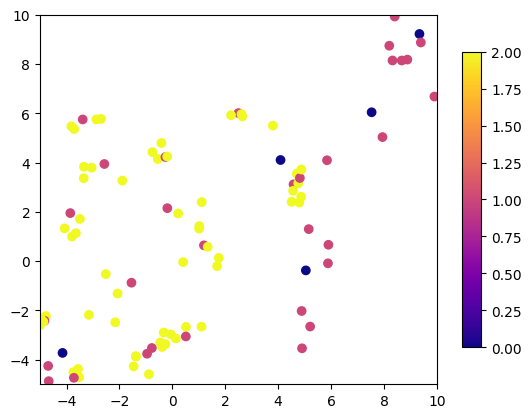

Optimum:
[0.643565499520308, 0.4245709588274986]
0.137849922102483


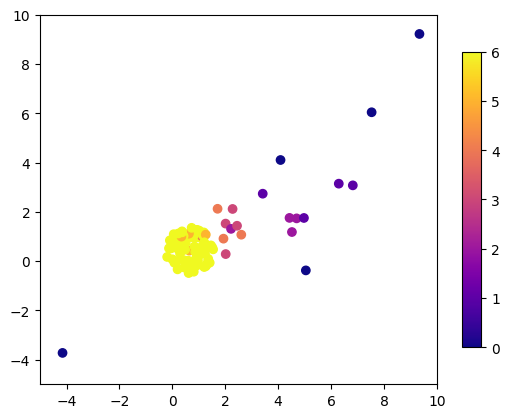

Optimum:
[0.643565499520308, 0.4245709588274986]
0.137849922102483


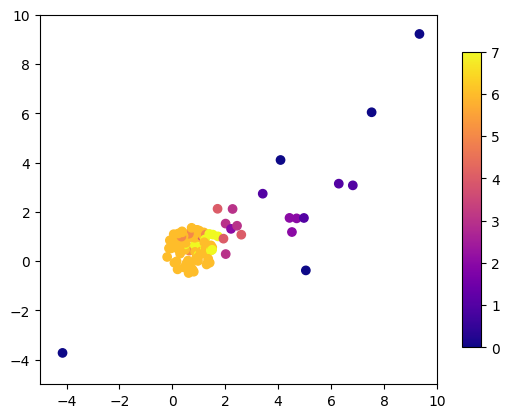

Optimum:
[0.8931788103078897, 0.4074622437376896]
15.245299327683705


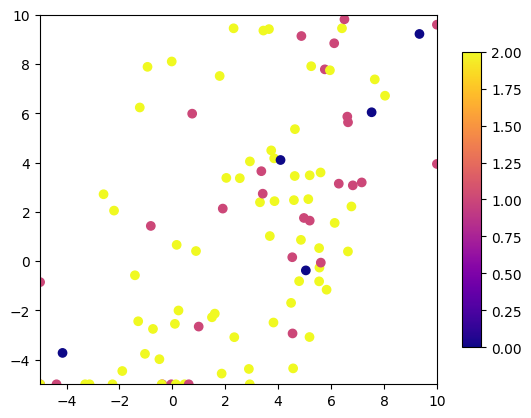

Optimum:
[2.6144571616087773, 6.775123038377165]
2.9696373928228916


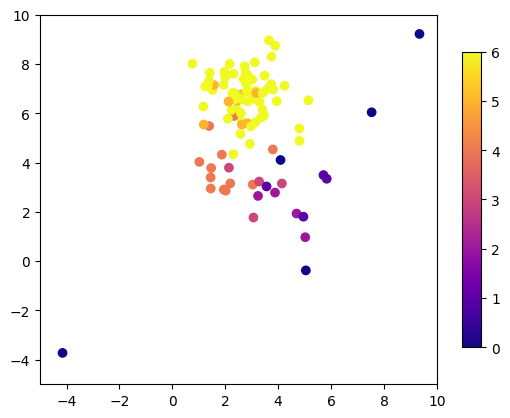

Optimum:
[1.739953724758915, 3.0791659300031715]
0.8150994128452439


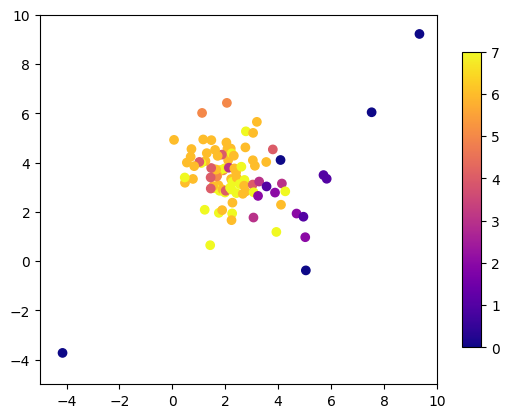

Optimum:
[2.192246346158144, 5.005551437432978]
5.40576257135103


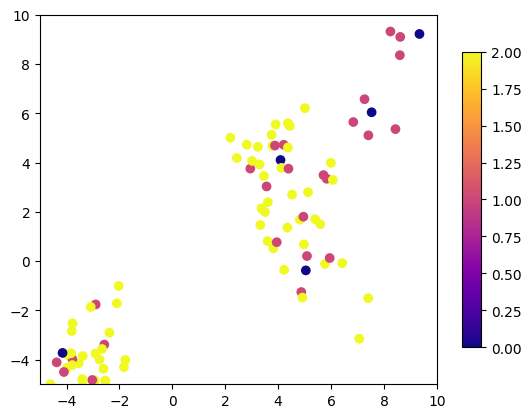

In [8]:

################## MODEL AND FUNCTION DEFINITION ####################

def evaluate_model(epochs, batch_size):
    #return epochs * batch_size
    ################### ROSENBROCK ###############
    sum = 0
    sum += (1-epochs)**2 + 100 * (batch_size - epochs**2) ** 2
    return sum

    # ################# RASTRIGIN #################
    sum = 0
    sum += epochs ** 2 - 10 * math.cos(2 * math.pi * epochs)
    sum += batch_size ** 2 - 10 * math.cos(2 * math.pi * batch_size)
    
    return len(hyperparameterspace) * 10 + sum

def function(coordinates):
    return evaluate_model(coordinates[0], coordinates[1])


BUDGET = 100
INIT_POINTS = 5

print("INITIAL POINTS:")

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, INIT_POINTS, 0, 0.5, init_points=INIT_POINTS, alternative=2)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()


reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.0, init_points=INIT_POINTS, alternative=0)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.5, init_points=INIT_POINTS, alternative=0)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 1.0, init_points=INIT_POINTS, alternative=0)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.0, init_points=INIT_POINTS, alternative=1)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.5, init_points=INIT_POINTS, alternative=1)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 1.0, init_points=INIT_POINTS, alternative=1)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.0, init_points=INIT_POINTS, alternative=2)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 0.5, init_points=INIT_POINTS, alternative=2)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()

reset_seeds()

optimizer = HPO.IterativeRandomOptimization(HPO.Dataset([],[]), function, hyperparameterspace, BUDGET, 0, 1.0, init_points=INIT_POINTS, alternative=2)
points = optimizer.fit()

smallest_value = points[0].get_value()
index = 0
for j in range(len(points)):
    if points[j].get_value() < smallest_value:
        smallest_value = points[j].get_value()
        index = j

print("Optimum:")
print(points[index].get_coordinates())
print(points[index].get_value())

x_values = []
y_values = []
z_values = []

for i in range(len(points)):
    x_values.append(points[i].get_coordinates()[0])
    y_values.append(points[i].get_coordinates()[1])
    z_values.append(points[i].get_level())

fig = plt.figure()
ax = plt.axes()
surface = plt.scatter(x_values, y_values, c=z_values, cmap="plasma")

ax.set_xlim([-5, 10])
ax.set_ylim([-5, 10])

fig.colorbar(surface, shrink=0.8, aspect=15)


plt.show()
